# Introduction to Scikit-Learn

This notebook demonstrates some of the most useful functions of the Scikit-Learn Library

0. And end to end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm
3. Fit the model/ algorithm
4. Evaluating a model
5. Improve the model
6. Save and load a trained model
7. Putting it all together 

## 0. An end to end Scikit-Learn workflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the data ready

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features_matrix)
X = heart_disease.drop("target", axis=1)


# Create Y (labels)
y = heart_disease["target"]

In [4]:
# 2. Chose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we'll Keep default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
# Make a prediction
# y_label = clf.predict(np.array())

y_preds = clf.predict(X_test)
y_preds
y_test

130    1
126    1
88     1
210    0
162    1
      ..
21     1
226    0
216    0
170    0
18     1
Name: target, Length: 61, dtype: int64

In [7]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [8]:
clf.score(X_test, y_test)

0.8524590163934426

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [10]:
  confusion_matrix(y_test, y_preds)

array([[22,  6],
       [ 3, 30]])

In [11]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [12]:
# Improve a model
# Try different amount of n_estimators
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy in test set {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy in test set 80.33%

Trying model with 20 estimators...
Model accuracy in test set 75.41%

Trying model with 30 estimators...
Model accuracy in test set 83.61%

Trying model with 40 estimators...
Model accuracy in test set 81.97%

Trying model with 50 estimators...
Model accuracy in test set 78.69%

Trying model with 60 estimators...
Model accuracy in test set 81.97%

Trying model with 70 estimators...
Model accuracy in test set 78.69%

Trying model with 80 estimators...
Model accuracy in test set 80.33%

Trying model with 90 estimators...
Model accuracy in test set 85.25%



In [13]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [14]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

## 1. Getting our data ready to be used with ML

Three main things we have to do:

   1. Split the data into features and labels (usually `X` and `y`)
   2. Filling or disregarding missing values
   3. Converting non-numerical values to numerical values aka feature encoding.

In [15]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure its all numerical

In [20]:
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [21]:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]","" , regex=True).astype(int)

In [22]:
car_sales["Price"] = car_sales["Price"] / 100

In [23]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [24]:
# Split into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]


# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4
5,Toyota,Green,99213,4
6,Honda,Blue,45698,4
7,Honda,Blue,54738,4
8,Toyota,White,60000,4
9,Nissan,White,31600,4


In [25]:
X_train

,Make,Colour,Odometer (KM),Doors
1,Honda,Red,87899,4
8,Toyota,White,60000,4
4,Nissan,White,213095,4
7,Honda,Blue,54738,4
6,Honda,Blue,45698,4
0,Toyota,White,150043,4
3,BMW,Black,11179,5
5,Toyota,Green,99213,4


In [26]:
X_test

,Make,Colour,Odometer (KM),Doors
9,Nissan,White,31600,4
2,Toyota,Blue,32549,3


In [27]:
y

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price, dtype: float64

In [28]:
y_train

1     5000.0
8     6250.0
4     3500.0
7     7000.0
6     7500.0
0     4000.0
3    22000.0
5     4500.0
Name: Price, dtype: float64

In [29]:
y_test

9    9700.0
2    7000.0
Name: Price, dtype: float64

In [30]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [31]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [32]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [33]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,False,False,True,False,False,False,False,True
1,4,False,True,False,False,False,False,False,True,False
2,3,False,False,False,True,False,True,False,False,False
3,5,True,False,False,False,True,False,False,False,False
4,4,False,False,True,False,False,False,False,False,True
5,4,False,False,False,True,False,False,True,False,False
6,4,False,True,False,False,False,True,False,False,False
7,4,False,True,False,False,False,True,False,False,False
8,4,False,False,False,True,False,False,False,False,True
9,4,False,False,True,False,False,False,False,False,True


In [34]:
# refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [35]:
X_train

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 9.92130e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 5.47380e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 3.16000e+04],
       [0.00000e+00, 0.00000e+

In [36]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
model.score(X_test, y_test)

-1.2793638399999998

### 1.2 What if there were missing values?
1. Fill them with some values (also known as imputation)
2. Remove the samples with missing values.

In [38]:
# Import car sales missing data.
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [39]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [40]:
# convert to numbers

# Split into X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X
 
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

pd.DataFrame(transformed_X)

,0
0,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 12)\t1.0\n..."
2,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
3,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 13)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
5,"(0, 3)\t1.0\n (0, 7)\t1.0\n (0, 12)\t1.0\n..."
6,"(0, 1)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
7,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
8,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 14)\t1.0\n..."
9,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


### Option 1: Fill missing data with pandas

In [41]:
# Fill the "Make" columns
car_sales_missing["Make"].fillna("missing", inplace=True)

# fill the "Colout" columns
car_sales_missing['Colour'].fillna("missing", inplace=True)

# fill the "Odometer columns".mean, inp
car_sales_missing['Odometer'].fillna(car_sales_missing["Odometer"].mean, inplace=True)

# Fill the "Doors" columns
car_sales_missing['Doors'].fillna(4, inplace=True)

# Fill the "Price" columns
car_sales_missing["Price"].fillna(car_sales_missing['Price'].mean, inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

### Option 2: Fill missing Values with Scikit-Learn

In [43]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing

car_sales_missing['Price'] = car_sales_missing["Price"].str.replace("[\$\,\.]", "", regex=True)

In [44]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
2,Toyota,Blue,NaN,3.0,7000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500
5,Toyota,Green,NaN,4.0,4500
6,Honda,NaN,NaN,4.0,7500
9,NaN,White,31600.0,4.0,9700


In [45]:
# Split into X,y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [46]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features ),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

pd.DataFrame(filled_X)

,0,1,2,3
0,Toyota,White,4.0,150043.0
1,Honda,Red,4.0,87899.0
2,Toyota,Blue,3.0,98763.2
3,BMW,Black,5.0,11179.0
4,Nissan,White,4.0,213095.0
5,Toyota,Green,4.0,98763.2
6,Honda,missing,4.0,98763.2
7,missing,White,4.0,31600.0


In [47]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer"])

In [48]:
car_sales_filled

,Make,Colour,Doors,Odometer
0,Toyota,White,4.0,150043.0
1,Honda,Red,4.0,87899.0
2,Toyota,Blue,3.0,98763.2
3,BMW,Black,5.0,11179.0
4,Nissan,White,4.0,213095.0
5,Toyota,Green,4.0,98763.2
6,Honda,missing,4.0,98763.2
7,missing,White,4.0,31600.0


In [49]:
car_sales_filled.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [50]:
# Turn the categories into numbers 
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<8x15 sparse matrix of type '<class 'numpy.float64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [51]:
# fit a model

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.28657376

## Choosing the right estimator/algorithm for our problem
Scikit-Learn uses etimator as another name for machine learning model  or algirithm

- Classification: predicting whether a sample is one thing or another
- Regression: predicting a number

In [52]:
 ## 2.1 Picking a machine learning model for a regression model.
from sklearn.datasets import fetch_california_housing
ca = fetch_california_housing()
ca

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [53]:
ca_df = pd.DataFrame(ca["data"], columns = ca["feature_names"])
ca_df['target'] = pd.Series(ca["target"])
ca_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [54]:
# How many samples
len(ca_df)

20640

In [55]:
from sklearn.linear_model import Ridge

np.random.seed(42)

X = ca_df.drop("target", axis=1)
y = ca_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440125

How do we improve this score?

What if ridge is not worling?

In [56]:
# check scikit learn map
# Try with random forest

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = ca_df.drop("target", axis=1)
y = ca_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8066196804802649

## Choosing an Estimator for a classification problem

In [57]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
len(heart_disease)

303

In [59]:
# Import linearSVC estimator class
from sklearn.svm import LinearSVC

np.random.seed(42)

# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate LinearSVC
clf.score(X_test, y_test)



/home/faraji/Developer/Learning/learning-ai/ZTM/Complete Machine Learning and Data Science 2021/Environment Setup/env/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/faraji/Developer/Learning/learning-ai/ZTM/Complete Machine Learning and Data Science 2021/Environment Setup/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [60]:
# Import linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate LinearSVC
clf.score(X_test, y_test)


0.8524590163934426

 #### Tidbit:
    1. If you have structured data, use ensemble methods.
    2. If you have unstructured data, use deep learning or transfer learning
    

## 3. Fit the model/algorithm , use it to make predictions
### 3.1 Fit the model to the data.

In [61]:
# Import linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier()

# Fit the model to the data. (Training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate LinearSVC (Use the patterns learned by the Model)
clf.score(X_test, y_test)
 

0.8524590163934426

### 3.2 Make predictions using the machine Learning Model
2 Ways to make predictions
- predict()
- predict_proba()

In [62]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [63]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [64]:
# Compare predictions to truth lables
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with `predict_proba`



In [66]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [67]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

## 4. Evaluating a model
3 ways to evaluate a scikit-learn model/estimator
- Estimator `Score` method
- The `scoring` parameter
- Problem specific metric functions


In [68]:
# Import linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier()

# Fit the model to the data. (Training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate LinearSVC (Use the patterns learned by the Model)


 

RandomForestClassifier()

### 4.1 The estimator score method


In [69]:
clf.score(X_test, y_test)

0.8524590163934426

### 4.2 Evaluating a method using the `scoring` parameter

In [70]:
from sklearn.model_selection import cross_val_score

# Import linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier()

# Fit the model to the data. (Training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate LinearSVC (Use the patterns learned by the Model)
clf.score(X_test, y_test)


0.8524590163934426

In [71]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [72]:
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))
clf_cross_val_score

0.8183606557377049

In [73]:
# Scoring parameter
cross_val_score(clf, X, y, scoring=None)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

**accuracy**

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# instantiate LinearSVC
clf = RandomForestClassifier()

cross_valuation_score = cross_val_score(clf, X, y)
np.mean(cross_valuation_score)

0.8248087431693989

**Area under the Receiver Operating Charasteristic curve (ROC Curve/ AUC(Area under curve ))**

- Area under curve(AUC)
- ROC Curve

ROC Curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).


- True Positive: A model predicts 1 when truth is 1
- False Positive: A model predicts 1 when truth is 0
- True Negative: A model predicts 0 when truth is 0
- False Negative: A model predicts 0 when truth is 1

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:5]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48]])

In [82]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.42, 0.91, 0.45, 0.25, 0.48])

In [83]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

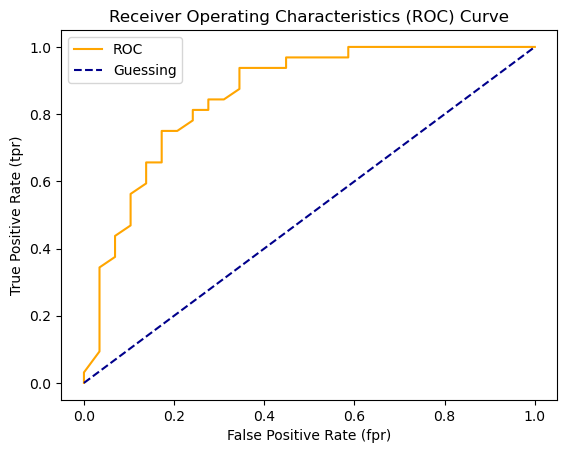

In [86]:
# Create a function for plotting ROC curves 

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC Curver given the false positive rate (fpr) and the 
    true positive rate (tpr) of a model. 
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show() 

plot_roc_curve(fpr, tpr)

In [89]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

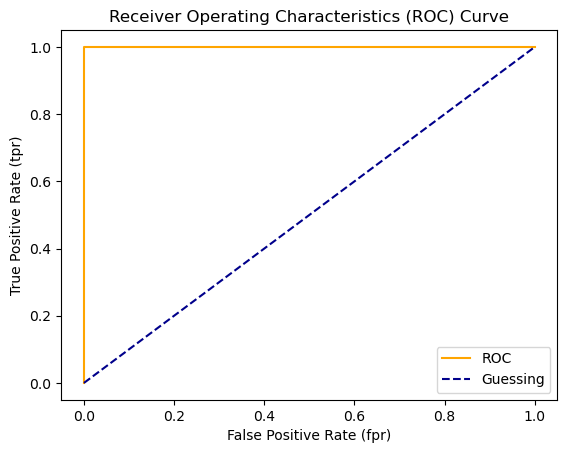

In [91]:
# Plot perfect ROC curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [92]:
# Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**
- is a quick way to campare the labels a model predicts and the actual lables it was supposed to predict.
- in essence giving you an idea of where the model is getting confused.

In [93]:
from sklearn.metrics import confusion_matrix
    
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]])

In [94]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, 
            y_preds, 
            rownames = ["Actual Label"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,8,24


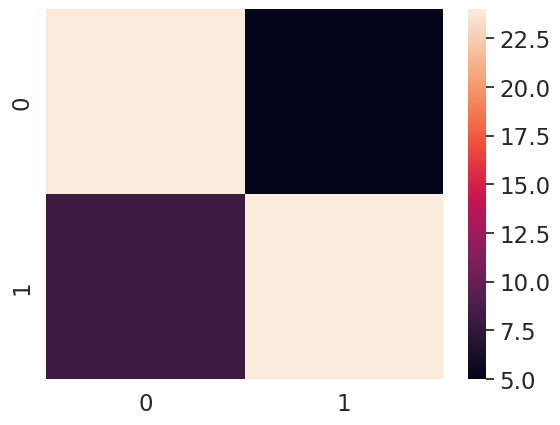

In [97]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns 

# set the font scale
sns.set(font_scale = 1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot using seaborn
sns.heatmap(conf_mat);

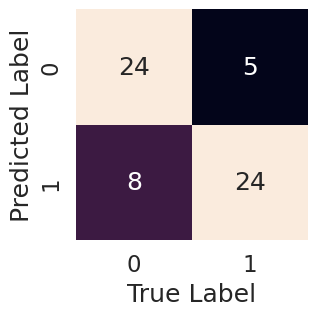

In [100]:
def plot_conf_mat(conf_mat):
    """ Plot confusion matrix using seaborns'n heatmap """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(
        conf_mat,
        annot=True,
        cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

**Classification Report**

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



To summarize classification metrics:
 - **Accuracy** is a good measure to start with if all classes are balanced(e.g same amount of samples which are labelled with 0 or 1)
 - **Precision** and **Recall** become more important when classes are imbalanced.
 - If false positive predictions are worse than false negatives, aim for higher precision.
 - If false negative predictions are worse than false positives, aim for higher recall
 - **F1-score** is a combination of precision and recall
 

### 4.2.2 Regression Models Evaluation metrics  
1. R^2 (pronounced r-squared) or cofficient of determination
2. Mean absolute error (MAE)
3. Mean Squared error (MSE)

In [110]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = ca_df.drop("target", axis=1)
y = ca_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

**R^2**

In [111]:
model.score(X_test, y_test)

0.8066196804802649

In [114]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [115]:
y_test.mean()

2.0550030959302323

In [116]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [117]:
r2_score(y_test, y_test_mean)

0.0

In [118]:
r2_score(y_test, y_test)

1.0

 **Mean Absolute Error (MAE)**
 
 MAE if the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [120]:
# Mean Absolut Error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [121]:
df = pd.DataFrame(data={
    "actual values":y_test,
    "predicted values":y_preds,
})

df

,actual values,predicted values
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760
...,...,...
15362,2.63300,2.220380
16623,2.66800,1.947760
18086,5.00001,4.836378
2144,0.72300,0.717820


In [122]:
df['differences'] = df['actual values'] - df['predicted values']
df

,actual values,predicted values,differences
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540290,-0.354290
9814,2.78000,2.331760,0.448240
...,...,...,...
15362,2.63300,2.220380,0.412620
16623,2.66800,1.947760,0.720240
18086,5.00001,4.836378,0.163632
2144,0.72300,0.717820,0.005180


**Mean squared error (MSE)**

In [124]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

### 4.2.3 Finally using the `scoring` parameter 

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# clf.fit(X_train, y_train)

np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [134]:
# Cross validated accuracy
np.mean(cv_acc)

0.8248087431693989

In [136]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [138]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8329547346025924

In [139]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall) 

0.8545454545454545

In [140]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1) 

0.8426854603423346

**How about a regression model?**

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = ca_df.drop("target", axis=1)
y = ca_df['target']

model = RandomForestRegressor()

In [142]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.51682354, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [143]:
# r-squared
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.51682354, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [144]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.54255936, -0.40903449, -0.43716367, -0.46911343, -0.47319069])

In [145]:
# Mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse 

array([-0.51906307, -0.34788294, -0.37112854, -0.44980156, -0.4626866 ])